<a href="https://colab.research.google.com/github/dmburns1729/Class-Files/blob/main/Copy_of_Multiclass_Classification_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout

#Sci-kit Learn
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Learning history plotting function
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""

  metrics = history.history.keys()

  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

# Multiclass Classification

In [ ]:
# Load Data
multi_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vR_I2xiiboTvyDr5-Cvvo_m7tnoT2tVnzOWUYf2xBZEhTWiWtZOyerF3c2aQeym10S8T2yHnTPnlPi2/pub?output=csv'
df_multi = pd.read_csv(multi_url)
df_multi.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
# Check for duplicates and missing data
print(df_multi.info())
print(f'{df_multi.duplicated().sum()} duplicate rows')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  155 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  157 non-null    float64
 3   Length2  157 non-null    float64
 4   Length3  150 non-null    float64
 5   Height   156 non-null    float64
 6   Width    157 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB
None
0 duplicate rows


In [ ]:
# count rows with missing values
na_rows = df_multi.isna().any(axis=1).sum()

print(f'{na_rows} rows are missing data')
print(f'{na_rows/len(df_multi)*100:.1f}% of rows are missing data')

20 rows are missing data
12.6% of rows are missing data


In [ ]:
# drop missing data
df_multi.dropna(inplace=True)
print(df_multi.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 0 to 157
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  139 non-null    object 
 1   Weight   139 non-null    float64
 2   Length1  139 non-null    float64
 3   Length2  139 non-null    float64
 4   Length3  139 non-null    float64
 5   Height   139 non-null    float64
 6   Width    139 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.7+ KB
None


In [ ]:
#check class balance
df_multi['Species'].value_counts()

Perch        48
Bream        30
Roach        16
Pike         13
Smelt        13
Parkki       11
Whitefish     6
Beam          2
Name: Species, dtype: int64

In [ ]:
# replace 'Beam' with 'Bream'
df_multi['Species'].replace('Beam','Bream', inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

# split data
X = df_multi.drop(columns='Species')
y = df_multi['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [ ]:
# scale data
scaler = StandardScaler()

scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
# encode labels
encoder = LabelEncoder()

encoder.fit(y_train)
y_train_enc = encoder.transform(y_train)
y_test_enc = encoder.transform(y_test)

# make a record of the classes, in order of the encoding, in case we want to
# translate predictions into fish names later.
classes = encoder.classes_

# binarize labels
binarizer = LabelBinarizer()

binarizer.fit(y_train_enc)
y_train_bin = binarizer.transform(y_train_enc)
y_test_bin = binarizer.transform(y_test_enc)

# check results
print('Original Target')
print(y_train.head())

print('\nEncoded Target')
print(y_train_enc[:5])

print('\nBinarized Target')
print(y_train_bin[:5])

Original Target
36     Roach
27     Bream
126    Perch
73     Perch
34     Bream
Name: Species, dtype: object

Encoded Target
[4 0 2 2 0]

Binarized Target
[[0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0]]


In [ ]:
# create model architecture

# define some parameters
input_dim = X_train_sc.shape[1]
num_classes = len(classes)

# instantiate the base model
multi_model = Sequential()

# add layers
multi_model.add(Dense(50, input_dim=input_dim, activation='relu'))
multi_model.add(Dropout(.3))
multi_model.add(Dense(50, activation='relu'))
multi_model.add(Dropout(.3))
multi_model.add(Dense(num_classes, activation='softmax'))
multi_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                350       
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                 357       
                                                                 
Total params: 3,257
Trainable params: 3,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile model with categorical_crossentropy

multi_model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy',
                             metrics.Precision(),
                             metrics.Recall()
                             ])

In [ ]:
# fit model

history = multi_model.fit(X_train_sc, y_train_bin,
                          validation_data=(X_test_sc, y_test_bin),
                          epochs=150,
                          verbose=0)

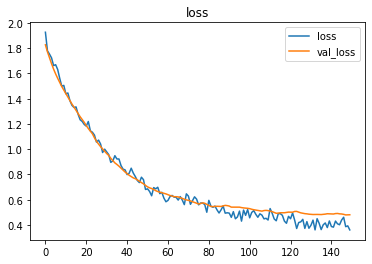

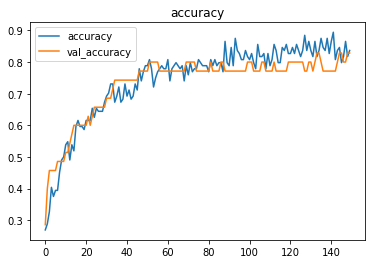

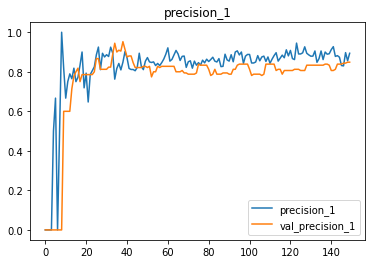

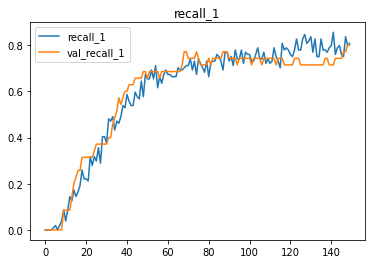

In [ ]:
plot_history(history)

In [ ]:
# get raw predictions
raw_pred = multi_model.predict(X_test_sc)

# display predictions and binarized true labels
print('Raw Predictions\n', raw_pred[:5])
print('\nbinarized y_test\n', y_test_bin[:5])

2/2 [==============================] - 0s 6ms/step
Raw Predictions
 [[1.8235434e-04 1.3820367e-07 9.6048367e-01 1.0880674e-02 6.5445340e-05
  2.0025470e-06 2.8385730e-02]
 [3.7321856e-03 1.9508844e-02 4.5711672e-01 8.1572048e-03 4.1240478e-01
  2.0788021e-02 7.8292198e-02]
 [7.8617624e-05 1.0628328e-02 5.0130308e-01 2.1803653e-04 1.7995802e-01
  3.0433816e-01 3.4757247e-03]
 [1.5244542e-02 2.4919289e-05 8.4594750e-01 1.5733022e-02 5.2769762e-04
  5.7544694e-05 1.2246483e-01]
 [9.9737507e-01 2.4337731e-03 1.8406665e-05 3.1326948e-07 8.5223601e-06
  8.2584330e-07 1.6301719e-04]]

binarized y_test
 [[0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0]]


In [ ]:
# convert predictions and labels into integers representing each fish class.
y_pred = np.argmax(raw_pred, axis=1)
y_true = np.argmax(y_test_bin, axis=1)

print('integer predictions', y_pred)
print('integer true labels', y_true)

integer predictions [2 2 2 2 0 2 5 3 2 0 2 0 3 2 0 2 2 2 2 0 1 3 1 5 2 2 5 0 0 1 2 0 5 2 2]
integer true labels [2 2 2 6 0 2 5 3 2 0 2 0 3 2 0 4 2 2 4 0 1 3 1 4 4 2 5 0 0 1 6 0 5 2 2]


              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00         8
      Parkki       1.00      1.00      1.00         3
       Perch       0.71      1.00      0.83        12
        Pike       1.00      1.00      1.00         3
       Roach       0.00      0.00      0.00         4
       Smelt       0.75      1.00      0.86         3
   Whitefish       0.00      0.00      0.00         2

    accuracy                           0.83        35
   macro avg       0.64      0.71      0.67        35
weighted avg       0.71      0.83      0.76        35



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


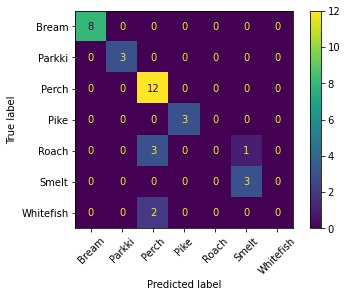

In [ ]:
print(classification_report(y_true, y_pred, target_names=classes))
ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                        display_labels=classes,
                                        xticks_rotation=45);